In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  # Import SVM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\yekta\Desktop\2023_nba_player_stats.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [6]:
# Check for missing values
print(df.isnull().sum())

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64


In [7]:
# Understand the distribution of numerical features
print(df.describe())

              Age          GP           W           L          Min  \
count  539.000000  539.000000  539.000000  539.000000   539.000000   
mean    25.970315   48.040816   24.018553   24.022263  1103.617625   
std      4.315513   24.650686   14.496366   13.445866   827.765114   
min     19.000000    1.000000    0.000000    0.000000     1.000000   
25%     23.000000   30.500000   12.000000   14.000000   329.000000   
50%     25.000000   54.000000   25.000000   25.000000   970.200000   
75%     29.000000   68.000000   36.000000   34.000000  1845.900000   
max     42.000000   83.000000   57.000000   60.000000  2963.200000   

               PTS         FGM          FGA         FG%         3PM  ...  \
count   539.000000  539.000000   539.000000  539.000000  539.000000  ...   
mean    523.426716  191.576994   403.005566   46.325232   56.324675  ...   
std     498.084360  178.351286   369.595909   10.967271   60.916821  ...   
min       0.000000    0.000000     0.000000    0.000000    0.0000

C:\Users\yekta\AppData\Local\Temp\ipykernel_12152\3346720154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

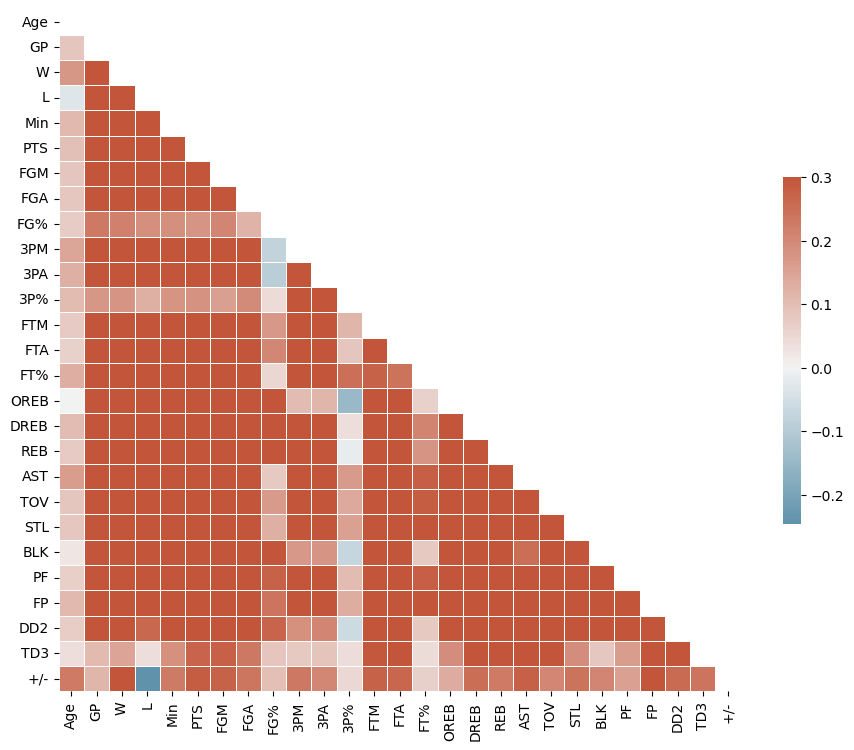

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df['PPG'] = df['PTS'] / df['GP']

X = df.drop(['PTS', 'PName'], axis=1)
X = pd.get_dummies(X, columns=['Team', 'POS'])

In [11]:
y = df['PTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f'Mean Absolute Error (MAE): {mae_lr}')
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'R-squared: {r2_lr}')

Linear Regression Results:
Mean Absolute Error (MAE): 1.848671717047118e-12
Mean Squared Error (MSE): 4.3646377447905234e-24
R-squared: 1.0


In [13]:
# Support Vector Machine Model
model_svm = SVR(kernel='linear')  # You can change the kernel as needed (linear, rbf, etc.)
model_svm.fit(X_train, y_train)


SVR(kernel='linear')

In [14]:
y_pred_svm = model_svm.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSupport Vector Machine Results:")
print(f'Mean Absolute Error (MAE): {mae_svm}')
print(f'Mean Squared Error (MSE): {mse_svm}')
print(f'R-squared: {r2_svm}')


Support Vector Machine Results:
Mean Absolute Error (MAE): 0.054234711730976236
Mean Squared Error (MSE): 0.0039524208789397455
R-squared: 0.9999999878972341


In [20]:
def predict_points_svm(player_name):
    player_data = df[df['PName'] == player_name]
    if len(player_data) == 0:
        print(f"No data available for player: {player_name}")
        return None
    player_features = player_data.drop(['PTS', 'PName'], axis=1)
    player_features = pd.get_dummies(player_features, columns=['Team', 'POS'])
    missing_cols = set(X_train.columns) - set(player_features.columns)
    for c in missing_cols:
        player_features[c] = 0
    player_features = player_features[X_train.columns]
    points_prediction = model_svm.predict(player_features)
    
    return points_prediction

# Predict points for all players using the SVM model
for player_name in all_player_names:
    predicted_points_svm = predict_points_svm(player_name)
    
    if predicted_points_svm is not None:
        print(f"\nPlayer Name: {player_name}")
        print(f"Predicted Points for {player_name} using SVM: {predicted_points_svm[0]:.2f}")
    else:
        print(f"No data available for player: {player_name}")


Player Name: Jayson Tatum
Predicted Points for Jayson Tatum using SVM: 2225.02

Player Name: Joel Embiid
Predicted Points for Joel Embiid using SVM: 2182.95

Player Name: Luka Doncic
Predicted Points for Luka Doncic using SVM: 2138.01

Player Name: Shai Gilgeous-Alexander
Predicted Points for Shai Gilgeous-Alexander using SVM: 2134.91

Player Name: Giannis Antetokounmpo
Predicted Points for Giannis Antetokounmpo using SVM: 1959.10

Player Name: Anthony Edwards
Predicted Points for Anthony Edwards using SVM: 1946.08

Player Name: Julius Randle
Predicted Points for Julius Randle using SVM: 1935.93

Player Name: Donovan Mitchell
Predicted Points for Donovan Mitchell using SVM: 1921.91

Player Name: Trae Young
Predicted Points for Trae Young using SVM: 1914.00

Player Name: Zach LaVine
Predicted Points for Zach LaVine using SVM: 1913.06

Player Name: Damian Lillard
Predicted Points for Damian Lillard using SVM: 1866.01

Player Name: De'Aaron Fox
Predicted Points for De'Aaron Fox using SVM


Player Name: Max Strus
Predicted Points for Max Strus using SVM: 922.96

Player Name: Caris LeVert
Predicted Points for Caris LeVert using SVM: 896.99

Player Name: Jakob Poeltl
Predicted Points for Jakob Poeltl using SVM: 896.95

Player Name: Tre Jones
Predicted Points for Tre Jones using SVM: 875.02

Player Name: Wendell Carter Jr.
Predicted Points for Wendell Carter Jr. using SVM: 867.89

Player Name: Mason Plumlee
Predicted Points for Mason Plumlee using SVM: 857.06

Player Name: Eric Gordon
Predicted Points for Eric Gordon using SVM: 855.91

Player Name: Kelly Olynyk
Predicted Points for Kelly Olynyk using SVM: 846.94

Player Name: LaMelo Ball
Predicted Points for LaMelo Ball using SVM: 837.99

Player Name: Markelle Fultz
Predicted Points for Markelle Fultz using SVM: 836.94

Player Name: Austin Reaves
Predicted Points for Austin Reaves using SVM: 832.91

Player Name: Patrick Williams
Predicted Points for Patrick Williams using SVM: 832.89

Player Name: Dennis Schroder
Predicted 


Player Name: Josh Green
Predicted Points for Josh Green using SVM: 545.96

Player Name: Luke Kennard
Predicted Points for Luke Kennard using SVM: 545.90

Player Name: Jordan Nwora
Predicted Points for Jordan Nwora using SVM: 542.03

Player Name: Troy Brown Jr.
Predicted Points for Troy Brown Jr. using SVM: 540.95

Player Name: Devonte' Graham
Predicted Points for Devonte' Graham using SVM: 538.95

Player Name: Nick Richards
Predicted Points for Nick Richards using SVM: 531.95

Player Name: Josh Okogie
Predicted Points for Josh Okogie using SVM: 529.08

Player Name: Jalen Suggs
Predicted Points for Jalen Suggs using SVM: 524.06

Player Name: Hamidou Diallo
Predicted Points for Hamidou Diallo using SVM: 521.93

Player Name: Terrence Ross
Predicted Points for Terrence Ross using SVM: 521.93

Player Name: Drew Eubanks
Predicted Points for Drew Eubanks using SVM: 517.97

Player Name: Tre Mann
Predicted Points for Tre Mann using SVM: 517.03

Player Name: Sam Hauser
Predicted Points for Sam 


Player Name: Luke Kornet
Predicted Points for Luke Kornet using SVM: 261.01

Player Name: Garrison Mathews
Predicted Points for Garrison Mathews using SVM: 257.07

Player Name: Austin Rivers
Predicted Points for Austin Rivers using SVM: 254.96

Player Name: Ish Wainright
Predicted Points for Ish Wainright using SVM: 250.94

Player Name: Aaron Holiday
Predicted Points for Aaron Holiday using SVM: 246.93

Player Name: Bryce McGowens
Predicted Points for Bryce McGowens using SVM: 246.07

Player Name: Malachi Flynn
Predicted Points for Malachi Flynn using SVM: 245.96

Player Name: Patty Mills
Predicted Points for Patty Mills using SVM: 246.04

Player Name: Duane Washington Jr.
Predicted Points for Duane Washington Jr. using SVM: 244.08

Player Name: Thaddeus Young
Predicted Points for Thaddeus Young using SVM: 240.05

Player Name: Cade Cunningham
Predicted Points for Cade Cunningham using SVM: 239.07

Player Name: Haywood Highsmith
Predicted Points for Haywood Highsmith using SVM: 235.96



Player Name: David Duke Jr.
Predicted Points for David Duke Jr. using SVM: 84.92

Player Name: Nikola Jovic
Predicted Points for Nikola Jovic using SVM: 81.95

Player Name: Kennedy Chandler
Predicted Points for Kennedy Chandler using SVM: 78.07

Player Name: Peyton Watson
Predicted Points for Peyton Watson using SVM: 75.02

Player Name: Kemba Walker
Predicted Points for Kemba Walker using SVM: 72.07

Player Name: Luka Samanic
Predicted Points for Luka Samanic using SVM: 69.10

Player Name: Serge Ibaka
Predicted Points for Serge Ibaka using SVM: 66.03

Player Name: Danny Green
Predicted Points for Danny Green using SVM: 61.04

Player Name: Jeff Dowtin Jr.
Predicted Points for Jeff Dowtin Jr. using SVM: 60.97

Player Name: Moussa Diabate
Predicted Points for Moussa Diabate using SVM: 59.00

Player Name: Mamadi Diakite
Predicted Points for Mamadi Diakite using SVM: 57.00

Player Name: A.J. Lawson
Predicted Points for A.J. Lawson using SVM: 55.95

Player Name: Quenton Jackson
Predicted Po


Player Name: Michael Foster Jr.
Predicted Points for Michael Foster Jr. using SVM: -0.04

Player Name: Sterling Brown
Predicted Points for Sterling Brown using SVM: 0.05
